# Entrenamiento de modelos empleando imágenes aumentadas


En este notebook se entrenará a los modelos anteriores de nuevo, pero esta vez se empleará la técnica de `Image Augmentation`. </br>

Esto se hará con el fin de reducir el overfitting y de preparar el modelo para responder a situaciones distintas, como la baja luminosidad, o angulos extraños de la cámara.


In [16]:
import sys

sys.path.append("../")  # Add the parent directory to the Python path

In [17]:
import matplotlib.pyplot as plt
import numpy as np

from src.data.data_loader import data_loader, data_loader_test
from src.data.augment_data import get_sequential_augmentation
from src.models.train import ModelTrainer, ModelConfiguration
from src.models.evaluator import ModelEvaluator
from src.config import CLASS_NAMES

## Carga de datos de entrenamiento y Aumento de Imágenes


El método `ImageGenerator` propuesto en el enunciado del ejercicio está marcado como **deprecated** en la documentación de Keras. Por este motivo, se procede a aumentar las imágenes mediante el método que se propone en esta documentación oficial que consiste en usar distintas de procesamiento de imágenes con parámetros aleatorios.</br>

En su lugar se ha planteado el aumento de imágenes utilizando un modelo secuencial sin backpropagation, este modelo se ejecutará sobre el dataset para aumentarlo.</br>

Se ha decidido seguir esta técnica tras buscar información acerca de las mejores prácticas en la documentación y en la comunidad. <br>

Para lograr esto se ha introducido el parámetro `data_augmentation_model` en data_loader, que permite aumentar las imágenes usando un modelo de aumento externo.


In [18]:
train_data, val_data = data_loader(
    "../data/train",
    (150, 150),
    batch_size=128,
    data_augmentation_model=get_sequential_augmentation(),
)

Found 12777 files belonging to 6 classes.
Using 10222 files for training.
Using 2555 files for validation.
augmenting images....


### Pasos de Data Augmentation

En lo que respecta a las etapas del modelo de aumento definido enla función `get_sequential_augmentation`, se tienen las siguientes:

1. **RandomFlip**: Aquí, se aplica una transformación de volteo horizontal de manera aleatoria a las imágenes de entrada. Esto significa que algunas imágenes pueden ser reflejadas horizontalmente.

2. **RandomRotation**: Se realiza una rotación aleatoria de las imágenes en un rango de ±0.1 radianes. Esto introduce variabilidad en la orientación de las imágenes.

3. **RandomZoom**: Se aplica un zoom aleatorio a las imágenes con un factor de hasta el 10%. Esto permite que el modelo vea las imágenes desde diferentes perspectivas.

4. **RandomContrast**: Se ajusta el contraste de las imágenes de forma aleatoria. El factor de contraste varía entre 0.8 y 1.4, lo que significa que algunas imágenes pueden tener un contraste reducido o aumentado.

</br>Y algunos más...


### Exploración de las imágenes aumentadas


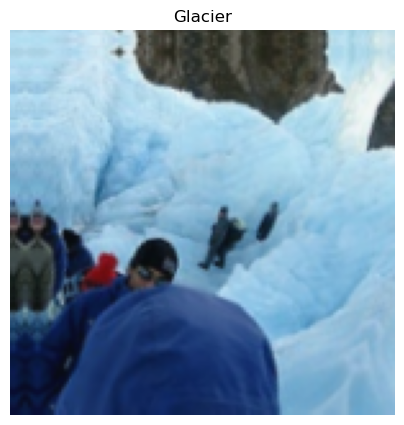

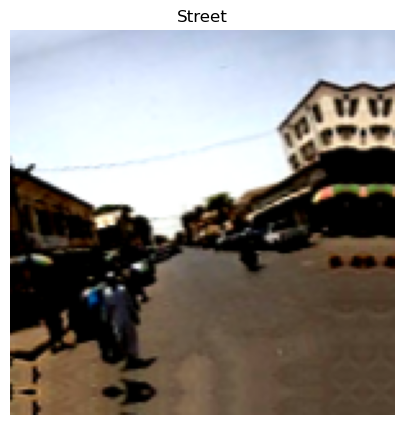

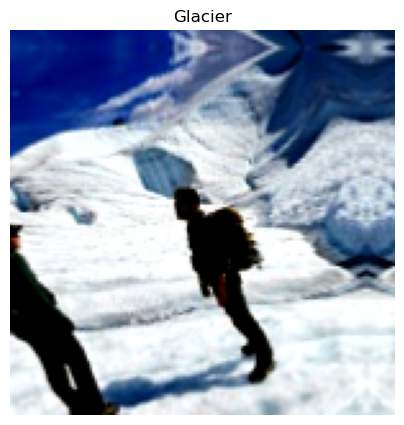

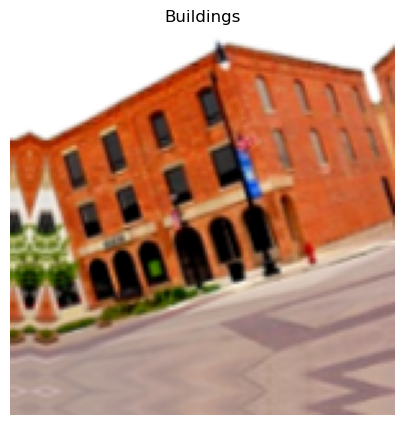

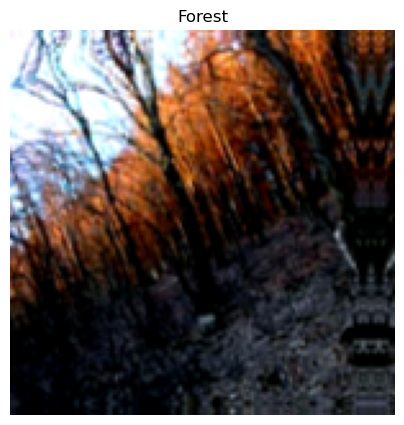

In [19]:
for images, labels in train_data.take(1):  # primer batch
    for i in range(5):
        plt.figure(figsize=(5, 5))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(CLASS_NAMES[np.argmax(labels[i])])
        plt.axis("off")
        plt.show()

## Carga de un modelo a entrenar para probar los aumentos de imágenes


In [20]:
# Mismo parámetro del apartado anterior
N_LAYERS_TO_TRAIN = 5

In [21]:
custom_xception_model = ModelTrainer(
    "xception_finetuned_augmented",
    ModelConfiguration.XCEPTION_CUSTOM,
    6,
)

In [22]:
custom_xception_model.train(
    train_data, val_data, epochs=25, n_layers_to_train=N_LAYERS_TO_TRAIN
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: keras, tensorboard, tensorflow.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/pablotorresr/modulo8/99ed758e5b7d4ba2803e235bd09086a1
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: 
COMET WARNING: To get a

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                            

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


80/80 [==============================] - 268s 3s/step - loss: 1.3243 - accuracy: 0.4957 - val_loss: 1.8939 - val_accuracy: 0.4227
Epoch 2/25
80/80 [==============================] - ETA: 0s - loss: 1.0617 - accuracy: 0.5884

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


80/80 [==============================] - 293s 4s/step - loss: 1.0617 - accuracy: 0.5884 - val_loss: 0.8671 - val_accuracy: 0.6724
Epoch 3/25
80/80 [==============================] - ETA: 0s - loss: 0.9831 - accuracy: 0.6210

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


80/80 [==============================] - 299s 4s/step - loss: 0.9831 - accuracy: 0.6210 - val_loss: 0.8336 - val_accuracy: 0.6767
Epoch 4/25
80/80 [==============================] - 282s 4s/step - loss: 0.9512 - accuracy: 0.6402 - val_loss: 0.8364 - val_accuracy: 0.6685
Epoch 5/25
80/80 [==============================] - 283s 4s/step - loss: 0.8945 - accuracy: 0.6613 - val_loss: 0.8513 - val_accuracy: 0.6865
Epoch 6/25
80/80 [==============================] - 284s 4s/step - loss: 0.8853 - accuracy: 0.6650 - val_loss: 0.9025 - val_accuracy: 0.6673
Epoch 7/25
80/80 [==============================] - ETA: 0s - loss: 0.8557 - accuracy: 0.6747

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


80/80 [==============================] - 316s 4s/step - loss: 0.8557 - accuracy: 0.6747 - val_loss: 0.7780 - val_accuracy: 0.7080
Epoch 8/25
80/80 [==============================] - ETA: 0s - loss: 0.8466 - accuracy: 0.6801

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


80/80 [==============================] - 318s 4s/step - loss: 0.8466 - accuracy: 0.6801 - val_loss: 0.7576 - val_accuracy: 0.7112
Epoch 9/25
80/80 [==============================] - 288s 4s/step - loss: 0.8086 - accuracy: 0.6948 - val_loss: 0.9117 - val_accuracy: 0.6775
Epoch 10/25
80/80 [==============================] - ETA: 0s - loss: 0.8130 - accuracy: 0.6909

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


80/80 [==============================] - 322s 4s/step - loss: 0.8130 - accuracy: 0.6909 - val_loss: 0.7467 - val_accuracy: 0.7151
Epoch 11/25
80/80 [==============================] - 280s 4s/step - loss: 0.8017 - accuracy: 0.6987 - val_loss: 0.8785 - val_accuracy: 0.6579
Epoch 12/25
80/80 [==============================] - 281s 4s/step - loss: 0.7878 - accuracy: 0.7050 - val_loss: 0.7735 - val_accuracy: 0.7061
Epoch 13/25
80/80 [==============================] - 285s 4s/step - loss: 0.7909 - accuracy: 0.7039 - val_loss: 0.8794 - val_accuracy: 0.6665
Epoch 14/25
80/80 [==============================] - 284s 4s/step - loss: 0.7812 - accuracy: 0.7037 - val_loss: 0.7604 - val_accuracy: 0.7100
Epoch 15/25
80/80 [==============================] - 287s 4s/step - loss: 0.7561 - accuracy: 0.7162 - val_loss: 0.7820 - val_accuracy: 0.7049
Epoch 16/25
80/80 [==============================] - ETA: 0s - loss: 0.7560 - accuracy: 0.7144

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


80/80 [==============================] - 318s 4s/step - loss: 0.7560 - accuracy: 0.7144 - val_loss: 0.7108 - val_accuracy: 0.7276
Epoch 17/25
80/80 [==============================] - 284s 4s/step - loss: 0.7605 - accuracy: 0.7089 - val_loss: 0.7271 - val_accuracy: 0.7198
Epoch 18/25
80/80 [==============================] - ETA: 0s - loss: 0.7447 - accuracy: 0.7206

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


80/80 [==============================] - 322s 4s/step - loss: 0.7447 - accuracy: 0.7206 - val_loss: 0.6833 - val_accuracy: 0.7382
Epoch 19/25
80/80 [==============================] - 286s 4s/step - loss: 0.7412 - accuracy: 0.7197 - val_loss: 0.7081 - val_accuracy: 0.7358
Epoch 20/25
80/80 [==============================] - 290s 4s/step - loss: 0.7389 - accuracy: 0.7184 - val_loss: 0.7111 - val_accuracy: 0.7295
Epoch 21/25
80/80 [==============================] - 289s 4s/step - loss: 0.7254 - accuracy: 0.7245 - val_loss: 0.7372 - val_accuracy: 0.7256
Epoch 22/25
80/80 [==============================] - 289s 4s/step - loss: 0.7132 - accuracy: 0.7310 - val_loss: 0.7082 - val_accuracy: 0.7374
Epoch 23/25
80/80 [==============================] - 280s 4s/step - loss: 0.7064 - accuracy: 0.7337 - val_loss: 0.7321 - val_accuracy: 0.7327
Epoch 24/25
80/80 [==============================] - ETA: 0s - loss: 0.7057 - accuracy: 0.7339

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


80/80 [==============================] - 260s 3s/step - loss: 0.7057 - accuracy: 0.7339 - val_loss: 0.6725 - val_accuracy: 0.7409
Epoch 25/25
80/80 [==============================] - 227s 3s/step - loss: 0.7145 - accuracy: 0.7328 - val_loss: 0.6796 - val_accuracy: 0.7393


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/pablotorresr/modulo8/0bc9a3ca07c04efd9a066395977ca218
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: keras, tensorboard, tensorflow.
COMET INFO: Please wait

INFO:tensorflow:Assets written to: ../models/xception_finetuned_augmented\assets


INFO:tensorflow:Assets written to: ../models/xception_finetuned_augmented\assets


## Test del modelo con aumentos de imágenes


In [23]:
SAVED_MODEL_ROUTE = "../models/xception_finetuned_augmented"
test_data = data_loader_test("../data/test", (150, 150))

Found 4257 files belonging to 6 classes.


In [24]:
model_evaluator = ModelEvaluator(SAVED_MODEL_ROUTE)

In [25]:
model_evaluator.evaluate(test_data)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: keras, tensorboard, tensorflow.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'c:\\Users\\pablo\\Documents\\Master\\Modulo_8\\notebooks' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/pablotorresr/modulo8/75de37b315c64530aa18bac4f2a39f1b



134/134 [==============================] - 80s 589ms/step - loss: 0.6674 - accuracy: 0.7541


COMET WARNING: Cannot safely convert [0.6674169898033142, 0.7540521621704102] object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/pablotorresr/modulo8/75de37b315c64530aa18bac4f2a39f1b
COMET INFO:   Metrics:
COMET INFO:     test_metrics : [0.6674169898033142, 0.7540521621704102]
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages  

Gracias a la técnica de image augmentation se ha conseguido mejorar el rendimiento del modelo desde un `0.7496` a `0.7541`.</br>

En este momento debe recordarse el hecho de que utilizar aumento de imágenes puede permitir entrenarse un modelo con menos riesgo de overfitting. En realidad las mejoras aportadas por este método para el entrenamiento aparecen en epochs posteriores, en el momento que el modelo con imágenes normales empieza a no mejorar su accuracy en el set de val.</br>

Se cree que si se hubiese dejado durante más epochs a este modelo entrenando con imágenes aumentadas, habría alcanzado un gran rendimiento. Esto se debe a que Xception es un modelo grande y necesita muchos epochs para ajustarse correctamente. Sin embargo, no se dispone de un equipo para llegar a este punto.
